In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import math
from VarPositionClasses2 import VarPositionStock_,VarPositionEuropeanOption_

In [2]:
AAPL = pd.read_csv('AAPL.csv', encoding='utf-8')
MSFT = pd.read_csv('MSFT.csv', encoding='utf-8')

In [3]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change(1)# daily returns 
MSFT['Daily Returns'] = MSFT['Adj Close'].pct_change(1)
AAPL.dropna()
MSFT.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
1,2018-06-07,102.650002,102.690002,100.379997,100.879997,99.268028,28232200,-0.015709
2,2018-06-08,101.089996,101.949997,100.540001,101.629997,100.006042,22165100,0.007435
3,2018-06-11,101.010002,101.589996,100.669998,101.050003,99.435326,23490900,-0.005707
4,2018-06-12,101.099998,101.449997,100.750000,101.309998,99.691162,18325200,0.002573
5,2018-06-13,101.720001,102.010002,100.559998,100.849998,99.238510,29492900,-0.004541
6,2018-06-14,101.650002,102.029999,101.000000,101.419998,99.799400,25691800,0.005652
7,2018-06-15,101.510002,101.529999,100.070000,100.129997,98.530022,65738600,-0.012719
8,2018-06-18,100.010002,101.110001,99.419998,100.860001,99.248360,23586000,0.007291
9,2018-06-19,99.650002,101.000000,99.500000,100.860001,99.248360,28653100,0.000000
10,2018-06-20,101.370003,102.519997,101.120003,101.870003,100.242218,26180800,0.010014


In [4]:
#Stock portfolio: position1 and position2
#Option portfolio: position3 and position4
#Following parameters are for simulation
rf=.05
path=10000
Year=90/252
SA=185.22 # AAPL start price
SM=127.82 # MSFT start price
day=90
position1 = VarPositionStock_('AAPL', 100)
position2 = VarPositionStock_('MSFT', 0)
position3 = VarPositionEuropeanOption_('AAPL',57,-1,'call',132,30)#strike = 132, expiracy = 30 when T=1
position4 = VarPositionEuropeanOption_('AAPL',100,0,'put',185,30)#strike = 185, expiracy = 30 when T=1

In [5]:
AAPL_M=AAPL['Daily Returns'].mean()
MSFT_M=MSFT['Daily Returns'].mean()
AAPL_S=AAPL['Daily Returns'].std()
MSFT_S=MSFT['Daily Returns'].std()
Cor=AAPL['Daily Returns'].corr(MSFT['Daily Returns'])

In [6]:
def std(ticker):
    if ticker=='AAPL':
        return(AAPL_M*math.sqrt(252))
    elif ticker=='MSFT':
        return(MSFT_T*math.sqrt(252))

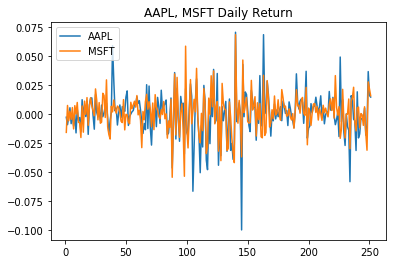

In [7]:
Return=pd.DataFrame({'ap':AAPL['Daily Returns'],'ms':MSFT['Daily Returns']},index=None,columns=['ap','ms'])
plt.title("AAPL, MSFT Daily Return")
plt.plot(Return['ap'], label='AAPL')
plt.plot(Return['ms'], label='MSFT')
plt.legend(loc='upper left')

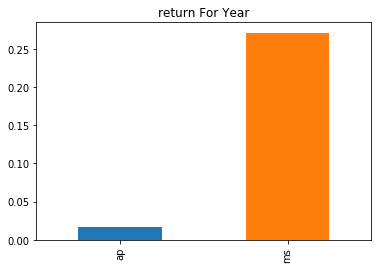

In [8]:
Return.sum().plot(kind='bar',title="return For Year")

In [9]:
from math import sqrt
def cholesky(A):
    """Performs a Cholesky decomposition of A, which must 
    be a symmetric and positive definite matrix. The function
    returns the lower variant triangular matrix, L."""
    n = len(A)

    # Create zero matrix for L
    L = [[0.0] * n for i in range(n)]

    # Perform the Cholesky decomposition
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            
            if (i == k): # Diagonal elements
                # LaTeX: l_{kk} = \sqrt{ a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}
                L[i][k] = sqrt(A[i][i] - tmp_sum)
            else:
                # LaTeX: l_{ik} = \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right)
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return (L)
A = [[1, Cor],[Cor, 1]]
L = cholesky(A)
rho0=L[1][0]
rho1=L[1][1]

In [10]:
#This step is for define z1 and z2
def random_num(random,days,I):
    np.random.seed(random)
    z= np.zeros((days+1,I))
    for i in range(1,days+1):
        z[i]= np.random.standard_normal(I)
    return(z)

In [11]:
def stock_monte_carlo(I,T,start_price,days,sigma,stock):
    S = np.zeros((days+1,I))
    S[0] = start_price
    dt=T/days
    # In order to seperate two stocks, I set two conditions
    if stock==1: 
        for t in range(1,days+1):
             S[t] = S[t-1] * np.exp((rf - 0.5 * sigma ** 2) * dt+sigma * math.sqrt(dt) * random_num(100,days,I)[t])
        return(S)
    if stock==2:
        for t in range(1, days+1):
             S[t]=S[t-1]*np.exp((rf-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*(rho0*random_num(100,days,I)[t]+rho1*random_num(50,days,I)[t]))
        return(S)

In [12]:
ap=stock_monte_carlo(path,Year,SA,day,AAPL_S*math.sqrt(252),1)

Text(0,0.5,'index level')

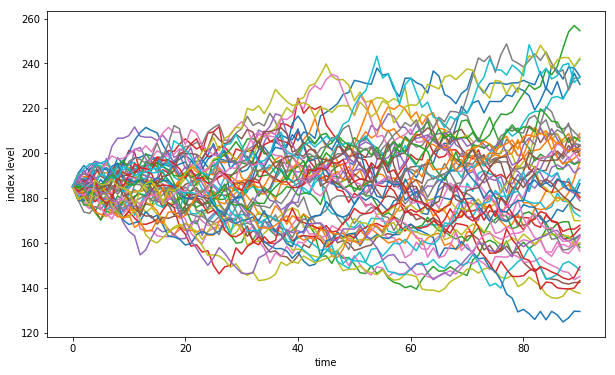

In [13]:
npathsToPlot = 50
plt.figure(figsize=(10,6))
plt.plot(ap[:,:npathsToPlot], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [14]:
ms=stock_monte_carlo(path,Year,SM,day,MSFT_S*math.sqrt(252),2)

Text(0,0.5,'index level')

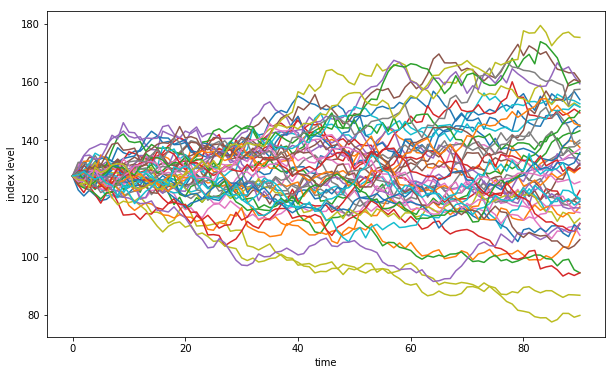

In [15]:
npathsToPlot = 50
plt.figure(figsize=(10,6))
plt.plot(ms[:,:npathsToPlot], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [16]:
# Var parameter:
def T(expiracy,var_day):# setting espiracy of the option and day for VaR
    return(expiracy-var_day)
def P(ticker,expiracy):
    if ticker=='AAPL':
        return(ap[expiracy+1])
    elif ticker=='MSFT':
        return(ms[expiracy+1])

In [17]:
# Var after 1 day and 5 days:
#Stock price at T=2, T=6
Price_2=position1.value(ap[2])+position2.value(ms[2])#T=2
Origin=position1.value(ap[1])+position2.value(ms[1])#T=1
Price_6=position1.value(ap[6])+position2.value(ms[6])#T=6

In [18]:
#calculate the value of each position in different days
OP3_1 = position3.value(P(position3.ticker,position3.expiryDays),rf,std(position3.ticker),T(position3.expiryDays,0))
OP3_2 = position3.value(P(position3.ticker,position3.expiryDays),rf,std(position3.ticker),T(position3.expiryDays,1))
OP3_6 = position3.value(P(position3.ticker,position3.expiryDays),rf,std(position3.ticker),T(position3.expiryDays,5))
# ap[31] is the spot price at the expriracy of the option
OP4_1 = position4.value(P(position4.ticker,position4.expiryDays),rf,std(position4.ticker),T(position4.expiryDays,0)) #T=1
OP4_2 = position4.value(P(position4.ticker,position4.expiryDays),rf,std(position4.ticker),T(position4.expiryDays,1)) #T=2
OP4_6 = position4.value(P(position4.ticker,position4.expiryDays),rf,std(position4.ticker),T(position4.expiryDays,5)) #T=6

In [19]:
OP3_1

array([-2952.65452514, -3185.946916  , -1953.43013848, ...,
       -1764.74609272, -2960.09947385, -3668.40219548])

In [20]:
#Step 2: Calculate the change of portfolio price for 1 day and 5 days
Total_2=(Price_2+OP3_2+OP4_2)-(Origin+OP3_1+OP4_1)
Total_6=(Price_6+OP3_6+OP4_6)-(Origin+OP3_1+OP4_1)

In [21]:
# Calculate the VaR of my portfolio at T=2 and T=6
Total_2.sort()
Total_6.sort()
d={'total_2':Total_2,'total_6':Total_6}
Data=pd.DataFrame(d,index=None,columns=['total_2','total_6'])
print('day1:\n')
Var90=Data['total_2'].quantile(0.1)
Var95=Data['total_2'].quantile(0.05)
Var99=Data['total_2'].quantile(0.01)
print('90% confidence Var: '+str(Var90))
print('95% confidence Var: '+str(Var95))
print('99% confidence Var: '+str(Var99)+'\n')
print('day5:\n')
Var90_=Data['total_6'].quantile(0.1)
Var95_=Data['total_6'].quantile(0.05)
Var99_=Data['total_6'].quantile(0.01)
print('90% confidence Var: '+str(Var90_))
print('95% confidence Var: '+str(Var95_))
print('99% confidence Var: '+str(Var99_))

day1:

90% confidence Var: -449.8292811492902
95% confidence Var: -580.7565461083586
99% confidence Var: -809.2913072655676

day5:

90% confidence Var: -991.3728093265997
95% confidence Var: -1266.987339823797
99% confidence Var: -1772.4547116597387


Text(0,0.5,'frequency')

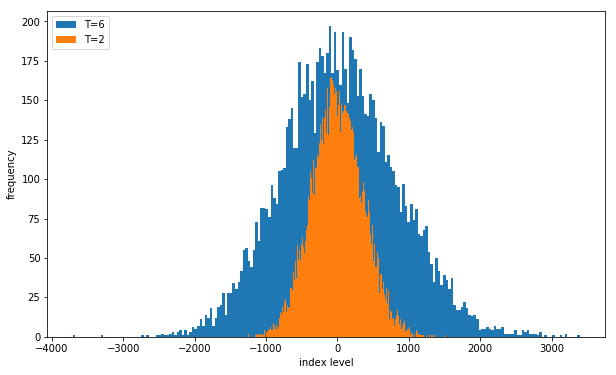

In [22]:
# compare distribution of VaR at different days
plt.figure(figsize=(10,6))
plt.hist(Total_6, bins=200, label='T=6')
plt.hist(Total_2, bins=200, label='T=2')
plt.legend(loc='upper left')
plt.xlabel('index level')
plt.ylabel('frequency')

Text(0,0.5,'frequency')

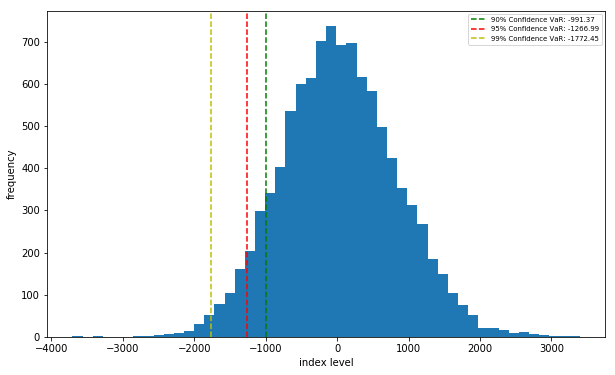

In [23]:
# T=6, var confidence = 90%, 95%, 99%
plt.figure(figsize=(10,6))
plt.hist(Total_6, bins=50)
plt.axvline(x=Var90_, color='g', linestyle='--', label='90% Confidence VaR: '+ "{0:.2f}".format(Var90_ )) 
plt.axvline(x=Var95_, color='r', linestyle='--', label='95% Confidence VaR: '+ "{0:.2f}".format(Var95_ ))  
plt.axvline(x=Var99_, color='y', linestyle='--', label='99% Confidence VaR: '+ "{0:.2f}".format(Var99_ ))  
plt.legend(loc='upper right', fontsize = 'x-small')
plt.xlabel('index level')
plt.ylabel('frequency')

In [24]:
# Validation
#history:
print(AAPL_M,'\t',MSFT_M,'\n')
print(AAPL_S,'\t',MSFT_S,'\t',Cor)

6.529244279472618e-05 	 0.001079126560055854 

0.01942364036458977 	 0.01644686614850641 	 0.6851112720335486


In [25]:
#Here I randomly choose a path, you can change path number you like. e.g.ap[1:,path-1],ms[1:,path-1]
new=pd.DataFrame({'apprice':ap[1:,5000],'msprice':ms[1:,5000]},index=None,columns=['apprice','msprice'])

In [26]:
new['apreturn']=new['apprice'].pct_change(1)
new['msreturn']=new['msprice'].pct_change(1)

In [27]:
new.dropna()

,apprice,msprice,apreturn,msreturn
1,181.589525,125.752805,0.008322,0.007111
2,179.524243,126.963409,-0.011373,0.009627
3,184.494782,127.753303,0.027687,0.006221
4,185.736572,126.706316,0.006731,-0.008195
5,178.994865,122.089954,-0.036297,-0.036434
6,175.545795,119.488180,-0.019269,-0.021310
7,176.637610,118.596743,0.006220,-0.007460
8,175.397970,116.044438,-0.007018,-0.021521
9,175.994121,114.867902,0.003399,-0.010139
10,176.151166,115.869996,0.000892,0.008724


In [28]:
#Simulation statistics
AAPL_PM=new['apreturn'].mean()
MSFT_PM=new['msreturn'].mean()
AAPL_PS=new['apreturn'].std()
MSFT_PS=new['msreturn'].std()
Cor_P=new['apreturn'].corr(new['msreturn'])
print(AAPL_PM,'\t',MSFT_PM,'\n')
print(AAPL_PS,'\t',MSFT_PS,'\t',Cor_P)

0.0004138158617688619 	 -0.0013394657731184243 

0.0158316199099273 	 0.014433106766617389 	 0.6884886202358779
